In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def get_month1(string):
    months = {'01':string[0:4]+' Jan','02':'Feb','03':'Mar','04':'Apr','05':'May','06':'Jun','07':'Jul','08':'Aug','09':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    return(months[string[5:7]])
def get_month2(string):
    var = string.split('/')
    months = {'1':'20'+var[2]+' Jan','2':'Feb','3':'Mar','4':'Apr','5':'May','6':'Jun','7':'Jul','8':'Aug','9':'Sep','10':'Oct','11':'Nov','12':'Dec'}
    return(months[var[0]])

In [4]:
old_date = ''
date_ios = []
date_labels_ios = []
total_ios = []
with open('nysmesonet-app_units-20191229-20200420.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for i,row in enumerate(spamreader):
        if i>4:
            data = row[0].split(',')
            new_date = get_month2(data[0])
            date1 = data[0].split('/')
            mo = int(date1[0])
            da = int(date1[1])
            if mo < 10: dash1 = '-0'
            else: dash1 = '-'
            if da < 10: dash2 = '-0'
            else: dash2 = '-'
            date2 = '20'+str(int(date1[2]))+dash1+str(int(date1[0]))+dash2+str(int(date1[1]))
#             print(date2)
            date_ios.append(date2)
            if new_date != old_date:
                date_labels_ios.append(new_date)
                old_date = new_date
            else:date_labels_ios.append('')
            val = float(data[1])
            if i==5:total_ios.append(val)
            else:total_ios.append(val+total_ios[i-6])
            

In [6]:
date = []
total = []
date_labels = []
old_date = ''
with open('Active_devices_Android_Version_Dec_29_2019-Apr_21_2020.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
    for i,row in enumerate(spamreader):
        if i > 3:
            data = row[2:3][0].split(',')
            new_date = get_month1(data[1])
            date1 = data[1].split('-')
            mo = int(date1[1])
            da = int(date1[2])
            if mo < 10: dash1 = '-0'
            else: dash1 = '-'
            if da < 10: dash2 = '-0'
            else: dash2 = '-'
            date2 = date1[0]+dash1+str(int(date1[1]))+dash2+str(int(date1[2]))
#             print(date2)
            
            date.append(date2)
            if new_date != old_date:
                date_labels.append(new_date)
                old_date = new_date
            else:date_labels.append('')
            val = data[3]
            if val == '-': total.append(None)
            else: total.append(int(val))

In [7]:
tot = []
for i,x in enumerate(total_ios):
    try: tot.append(total[i]+total_ios[i])
    except: tot.append(None)


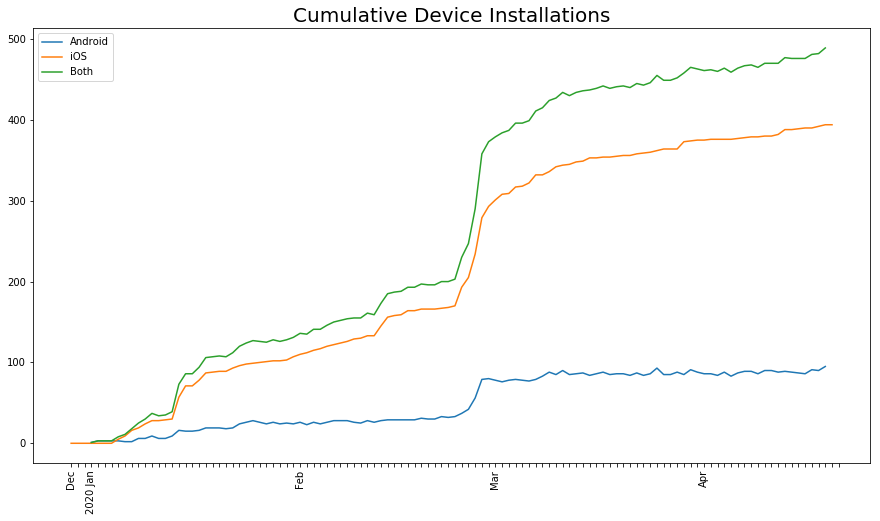

In [150]:
fig, ax1 = plt.subplots(figsize=(15,8))
plt.plot(date,total, label='Android')
plt.plot(date_ios,total_ios, label='iOS')
plt.plot(date_ios,tot, label='Both')


# plt.plot(np.arange(len(total)),total)
plt.xticks(np.arange(len(date)),date_labels,rotation=90)
plt.title('Cumulative Device Installations',size=20)
plt.legend()
plt.savefig('plots/installs.eps',format='eps')

In [218]:
categories = {}
header_val = []
header = ''
with open('Amplitude_04-21-20.csv', newline='') as csvfile:
    spamreader = csv.reader(csvfile, delimiter=' ', quotechar='|')
#     print(spamreader[0])
    for i,row in enumerate(spamreader):
        if i == 0: 
            for r in row:header=header+r
            for x in header.split(','):
                categories[x.strip('"').strip('\t').strip()]=[]
                header_val.append(x.strip('"').strip('\t').strip())
        else:
            r1 = ''
            for r in row: r1 = r1+r
            for i,x in enumerate(r1.split('","')): 
                val = x.strip('"').strip('\t').strip()
                if header_val[i] == '30DayVolume'  or header_val[i] == '30DayQueries': val = int(val)
                
                categories[header_val[i]].append(val)
event = categories['EventName']
volume = categories['30DayVolume']
combine = zip(volume,event)
nonanon = 0
nonanontot = 0
for x in combine:
    if '@' in x[1]: 
        nonanon = nonanon + 1
        nonanontot = nonanontot + x[0]
event = categories['EventName']
volume = categories['30DayVolume']
event.append('nonanon')
volume.append(nonanon)
z = sorted(zip(volume,event),reverse=True)

In [219]:
combine

In [220]:
xx=[]
yy=[]

for x in z:
    print(x[1],'@' in x[1])
    if ('@' in x[1]) == False and x[0]>5:
        if x[1][:21] == 'MesoScreenChangeImage':xx.append(x[1][21:])
        else:xx.append(x[1])
        yy.append(x[0])

MesoScreen False
Appstartedbyuser False
anonymouslysignin False
MapTab False
AboutScreen False
MesoScreenChangeImageRedfield False
nonanon False
ProfileScreen False
ViewTab False
MesoScreenChangeImageGroton False
ContactScreen False
Toggle_alerts False
MesoScreenChangeImageCliftonSprings False
NetTab False
InfoTab False
MesoScreenChangeImageBinghamton False
MesoScreenChangeImageSouthBristol False
MesoScreenChangeImageCobleskill False
MesoScreenChangeImageKinderhook False
MesoScreenChangeImageBelmont False
MesoScreenChangeImageVoorheesville False
MesoScreenChangeImageRush False
MesoScreenChangeImageHighFalls False
MesoScreenChangeImageTannersville False
MesoScreenChangeImageStephentown False
MesoScreenChangeImageMedusa False
MesoScreenChangeImageBrockport False
MesoScreenChangeImageWhitefaceMountainBase False
MesoScreenChangeImageBuffalo False
MesoScreenChangeImageRoxbury False
MesoScreenChangeImagePiseco False
MesoScreenChangeImageSchodack False
MesoScreenChangeImageIndianLake False
Me

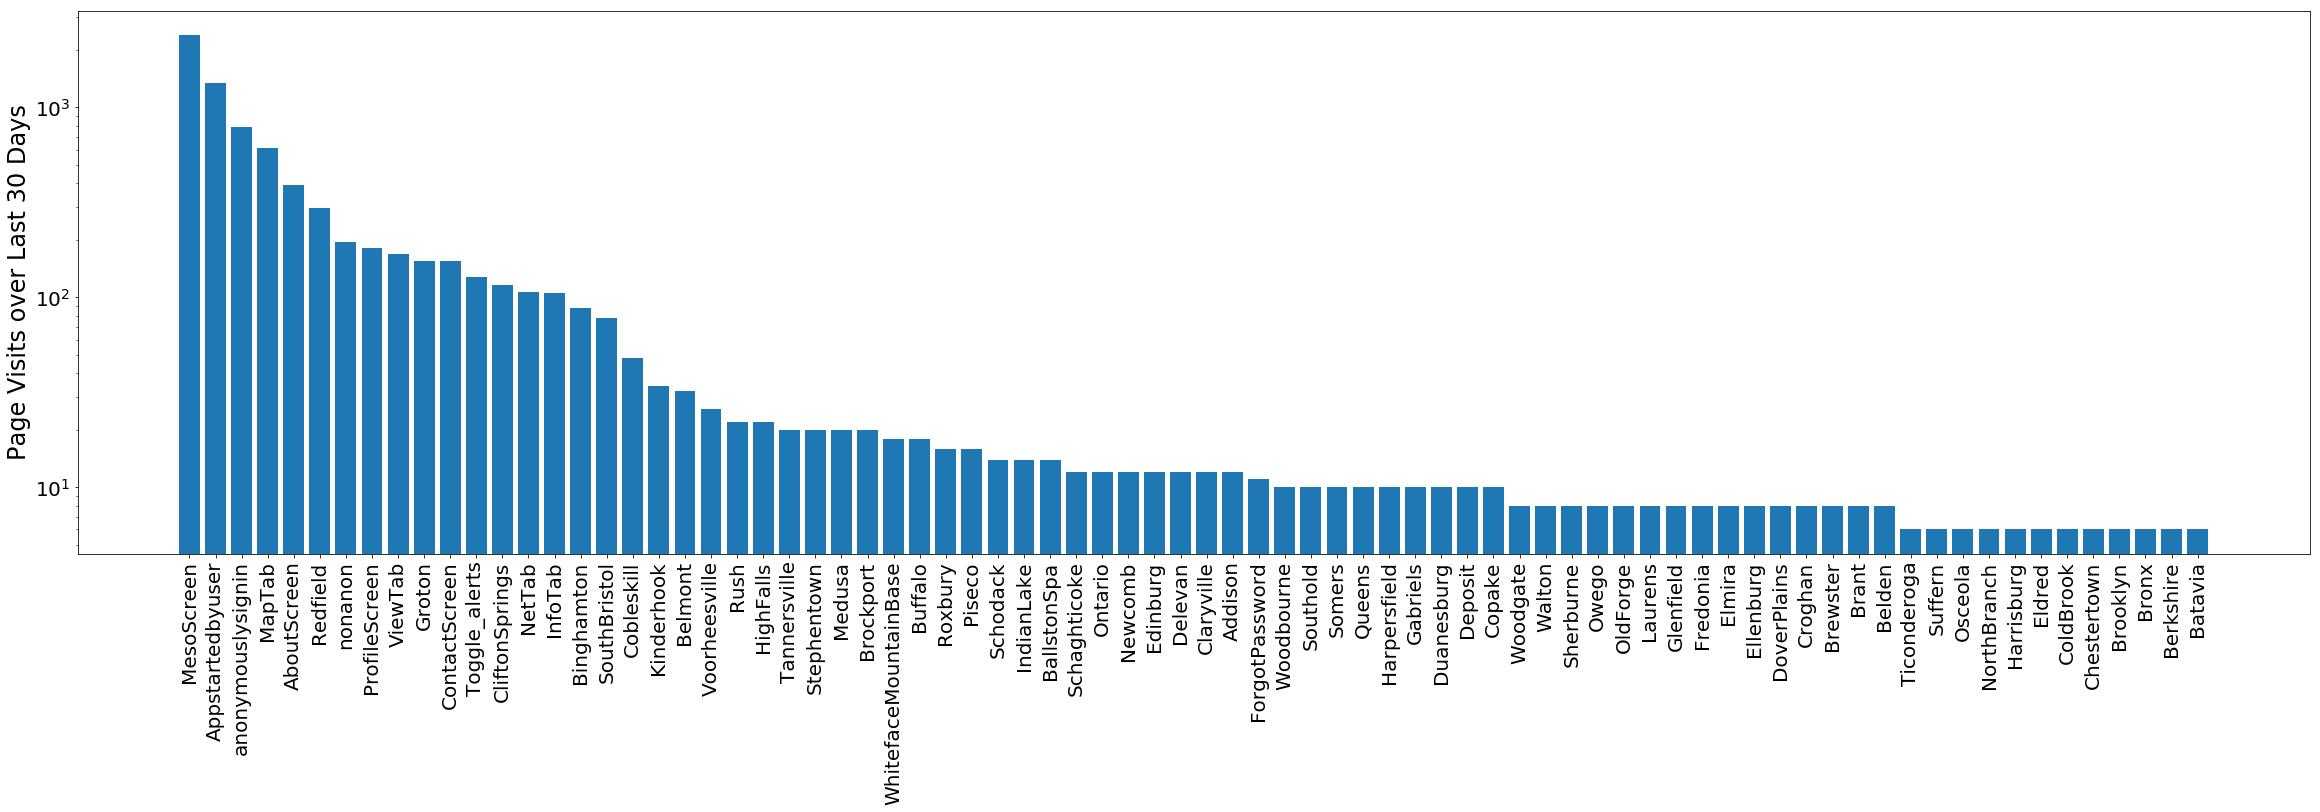

In [221]:
fig,ax = plt.subplots(figsize=(40,10))
plt.bar(range(len(xx)),yy)
plt.xticks(range(len(xx)),xx,rotation=90,size=20)
plt.yticks(size=20)
plt.yscale('log')
plt.ylabel('Page Visits over Last 30 Days',size=24)
plt.savefig('plots/pages.png',format='png',bbox='tight')